In [40]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [42]:
def Direction_Matrix(angle):
    theta = np.radians(-angle)
    c, s = np.cos(theta), np.sin(theta)
    Rot = np.array(((c, -s), (s, c)))
    return Rot

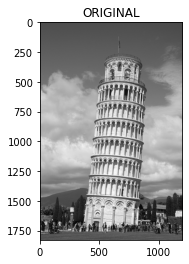

In [44]:
img = cv2.imread('pisa.jpeg',0) 
np_img = np.array(img)

plt.title('ORIGINAL')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [45]:
#rotate anti-clockwise
def customrotate(img,angle):
    
    #position the center at (0,0)
    (h, w) = img.shape[:2]
    center = (w / 2, h / 2)
    
    Biliner_new_img = np.zeros((h,w))
    Normal_new_img = np.zeros((h,w))
    
    #get direction matrix
    Mat = Direction_Matrix(angle)
    
    for i in range(w):
        for j in range(h):
            (x,y)=np.matmul(Mat,np.array([i-center[0],center[1]-j]))
            (x,y)=(x+center[0],center[1]-y)
            
            if(y<=h-1 and x<=w-1 and y>=0 and x>=0):
                (x1,y1)=(math.floor(x),math.floor(y))
                p1=(x-x1)*(y-y1)
                
                (x2,y2)=(math.floor(x),math.ceil(y))
                p2=(x-x2)*(-(y-y2))
                
                (x3,y3)=(math.ceil(x),math.floor(y))
                p3=(-(x-x3))*(y-y3)
                
                (x4,y4)=(math.ceil(x),math.ceil(y))
                p4=(-(x-x4))*(-(y-y4))
                
                Normal_new_img[j][i] = img[int(y)][int(x)]
                Biliner_new_img[j][i] = int((img[y1][x1]*p4+img[y2][x2]*p3+img[y3][x3]*p2+img[y4][x4]*p1))
    
    return Normal_new_img, Biliner_new_img


In [46]:
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    Mat = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, Mat, (w, h))

    return rotated

(-0.5, 1199.5, 1827.5, -0.5)

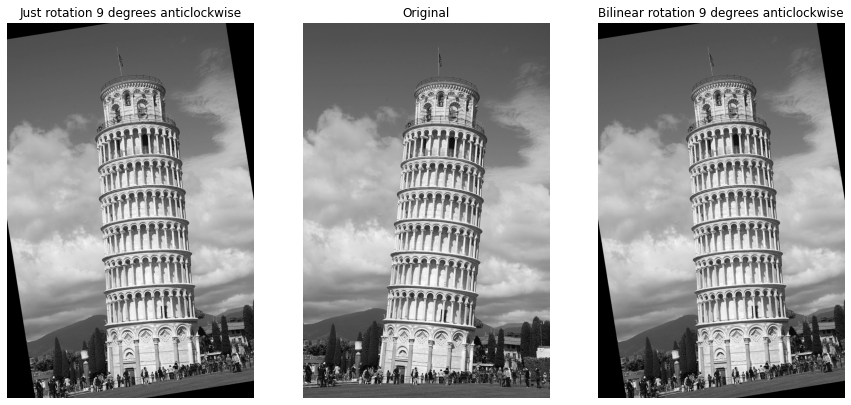

In [47]:
#Bilinear vs Normal rotation
angle=9
norm,rot=customrotate(img,angle)

f,ax=plt.subplots(1,3,figsize=(15,9))

ax[0].imshow(norm, cmap = "gray")
ax[0].set_title("Just rotation "+str(angle)+" degrees anticlockwise")
ax[0].axis("off")

ax[1].imshow(img, cmap = "gray")
ax[1].set_title("Original")
ax[1].axis("off")

ax[2].imshow(rot, cmap = "gray")
ax[2].set_title("Bilinear rotation "+str(angle)+" degrees anticlockwise")
ax[2].axis("off")

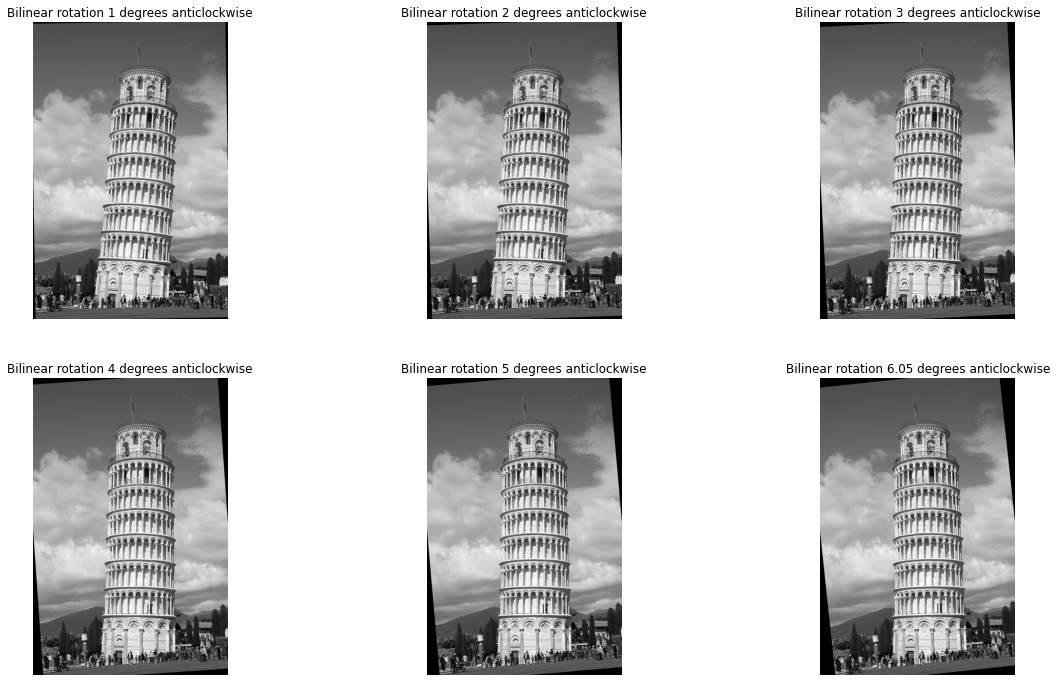

In [48]:
f,ax=plt.subplots(2,3,figsize=(20,12))

for angle in [1,2,3,4,5,6.05]:
    norm,rot=customrotate(img,float(angle))
    ax[int((angle-1)/3),int((angle-1)%3)].imshow(rot, cmap = "gray")
    ax[int((angle-1)/3),int((angle-1)%3)].set_title("Bilinear rotation "+str(angle)+" degrees anticlockwise")
    ax[int((angle-1)/3),int((angle-1)%3)].axis("off")
    
plt.show()

In [50]:
print("6-6.1 degrees seems most approximate angle of inclination.")

6-6.1 degrees seems most approximate angle of inclination.
